In [2]:
import pandas as pd

# Llegim i carreguem el dataset a un dataframe
df = pd.read_csv("hotel_bookings_raw.csv", sep=',')

# Mostra una vista previa
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.96,194.0,0.187566,41.2,41355.0


In [3]:
# Mostra quants valors nuls en total tenim
null_count = df.isnull().sum().sum()
print('Nombre de valors nuls:', null_count)

# Mostra els valors nuls per a cada atrbiut
print("\n++++++++++++\n")
idx = df.isnull() 
print(idx.sum())

Nombre de valors nuls: 18823

++++++++++++

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16

In [4]:
# Elimina els valors nuls

df_net = df.dropna()

In [5]:
# Mostra quants valors nuls tenim ara
null_count = df_net.isnull().sum().sum()
print('Nombre de valors nuls:', null_count)

Nombre de valors nuls: 0


In [6]:
# exportem el conjunt de dades a un fitxer de Excel

df_net.to_csv("hotel_bookings_netejat.csv")

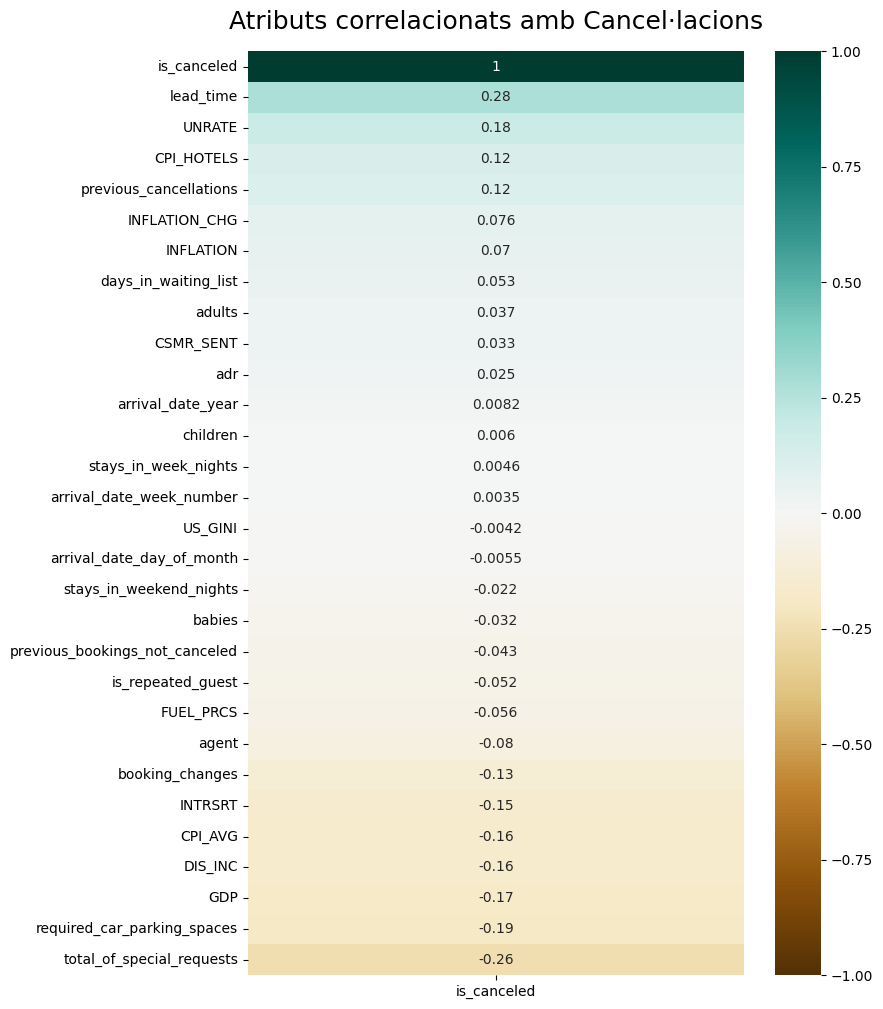

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# Convertim les variables categòriques (One-Hot Encoding)
data_encoded = pd.get_dummies(df_net, drop_first=True)


# Eliminem els valors nuls
data_encoded = data_encoded.dropna()  



# Ens assegurem que totes les columnes siguin numèriques
numeric_columns = data_encoded.select_dtypes(include=[np.number]).columns
data_encoded = data_encoded[numeric_columns]

# Obtenim els valors numèrics
data_values = data_encoded.values

# càlcul de la matriu de correlació
correlation_matrix = np.corrcoef(data_values, rowvar=False)

# Creem el dataframe a apartir de la matriu de correlació
correlation_df = pd.DataFrame(correlation_matrix, index=data_encoded.columns, columns=data_encoded.columns)

# Extraiem la correlació de totes les característiques amb el target class 'is_canceled'
correlation_with_target = correlation_df[['is_canceled']].sort_values(by='is_canceled', ascending=False)

# Mostra la gràfica heatmap de les correlacions
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(correlation_with_target, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Atributs correlacionats amb Cancel·lacions', fontdict={'fontsize':18}, pad=16)
plt.show()

C:\Users\guill\AppData\Local\Temp\ipykernel_15048\1533291075.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Blues_d')


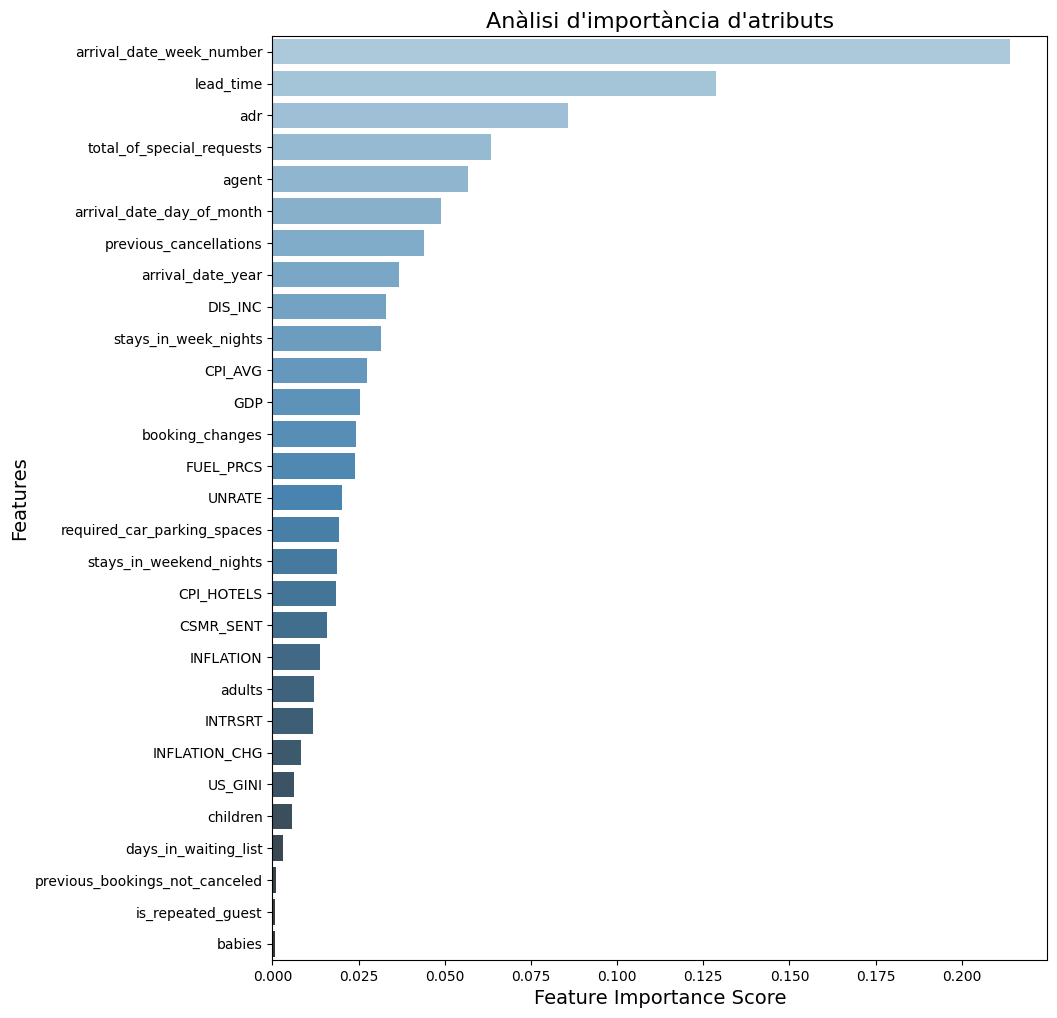

In [13]:

'''
Fonts consultades:


'''

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assegurem que totes les columnes siguin de tipus numèric
numeric_columns = data_encoded.select_dtypes(include=[np.number]).columns
data_encoded = data_encoded[numeric_columns]

# Definim les característiques (X) i la variable target (y)
X = data_encoded.drop('is_canceled', axis=1)
y = data_encoded['is_canceled']

# Separem les dades entre el conjunt d'entrenament (80%) i el conjunt de prova (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenem un model de RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fem l'extracció de característiques
importances = model.feature_importances_
feature_names = X.columns

# Creem un dataframe per a poder fer la visualització
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualitzat el gràfic d'importància d'atributs, amb un gràfic de barres de Seaborn
f, ax = plt.subplots(figsize=(10, 12))  # Adjust the figsize as needed
ax = sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Blues_d')
ax.set_title("Anàlisi d'importància d'atributs", fontsize=16)
ax.set_xlabel("Feature Importance Score", fontsize=14)
ax.set_ylabel("Features", fontsize=14)
plt.show()